In [109]:
pwd

'/home/gptuser/courses/ai-feb-2024'

In [110]:
cd datasets/

/home/gptuser/courses/ai-feb-2024/datasets


In [111]:
!wget https://online.innosoft.ai/assets/courseware/v1/4578813524c4e208db1323828843093d/asset-v1:InnosoftGulf+AI-200+2024_02+type@asset+block/Classified_Data

--2024-03-03 18:53:33--  https://online.innosoft.ai/assets/courseware/v1/4578813524c4e208db1323828843093d/asset-v1:InnosoftGulf+AI-200+2024_02+type@asset+block/Classified_Data
Resolving online.innosoft.ai (online.innosoft.ai)... 212.71.253.244
Connecting to online.innosoft.ai (online.innosoft.ai)|212.71.253.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194323 (190K) [application/octet-stream]
Saving to: ‘Classified_Data.2’

Classified_Data.2   100%[===================>] 189.77K   725KB/s    in 0.3s    

2024-03-03 18:53:34 (725 KB/s) - ‘Classified_Data.2’ saved [194323/194323]



In [112]:
ls

Classified_Data    ml-100k/       Salaries.csv    titanic_train.csv
Classified_Data.1  ml-100k.zip    Salaries.csv.1  USA_Housing.csv
Classified_Data.2  my_report.csv  Salaries.csv.2


In [113]:
cd ..

/home/gptuser/courses/ai-feb-2024


In [114]:
pwd

'/home/gptuser/courses/ai-feb-2024'

In [115]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [116]:
!file datasets/Classified_Data

datasets/Classified_Data: CSV text


In [117]:
df = pd.read_csv('datasets/Classified_Data', index_col=0)

In [118]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()

In [121]:
features = df.drop('TARGET CLASS', axis = 1)

In [122]:
features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [123]:
scaler.fit(features) # Calculates the mean and std for the features.

StandardScaler()

In [124]:
scaled_features = scaler.transform(features) # Normalize the data.

In [125]:
scaled_features[:2]

array([[-0.12354188,  0.18590747, -0.91343069,  0.31962911, -1.03363681,
        -2.3083747 , -0.79895135, -1.48236813, -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333,  0.62538826, -0.44484713,
        -1.15270604, -1.12979749, -0.20224031, -1.82805088,  0.63675862]])

In [126]:
type(scaled_features)

numpy.ndarray

In [127]:
scaled_features.shape

(1000, 10)

In [128]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [129]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [130]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [131]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WTT     1000 non-null   float64
 1   PTI     1000 non-null   float64
 2   EQW     1000 non-null   float64
 3   SBI     1000 non-null   float64
 4   LQE     1000 non-null   float64
 5   QWG     1000 non-null   float64
 6   FDJ     1000 non-null   float64
 7   PJF     1000 non-null   float64
 8   HQE     1000 non-null   float64
 9   NXJ     1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


In [132]:
df_feat.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.119105e-16,-2.939871e-16,-1.203482e-16,-1.882938e-16,-6.057377e-16,3.552714e-17,2.255973e-16,-4.760636e-16,3.197442e-16,4.503065e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


In [133]:
X = df_feat
y = df['TARGET CLASS']

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30, random_state=101)

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
knn = KNeighborsClassifier(n_neighbors=39)

In [138]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=39)

In [139]:
predictions = knn.predict(X_test)

In [140]:
from sklearn.metrics import classification_report, confusion_matrix

In [141]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       159
           1       0.94      0.95      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [142]:
print(confusion_matrix(y_test, predictions))

[[151   8]
 [  7 134]]


In [93]:
# Tuning our model 

In [100]:
error_rate = []

for k in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction_k = knn.predict(X_test)
    error_rate.append(np.mean(prediction_k != y_test))

Text(0, 0.5, 'Error Rate')

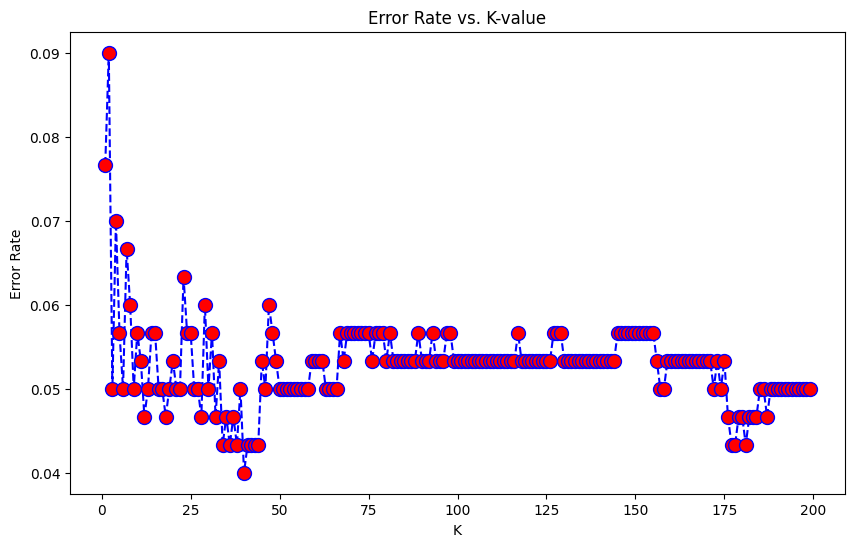

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 200), error_rate, color = 'blue',
          linestyle = 'dashed', marker = 'o', markerfacecolor = 'red',
          markersize = 10 )
plt.title('Error Rate vs. K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [105]:
np.mean(prediction_k != y_test)

0.05

In [106]:
len(y_test)

300

In [107]:
my_errors_array = np.array(error_rate)

In [108]:
np.argmin(my_errors_array)

39